# nmi | spring 2024
## lecture 19 : PDEs


## 8 partial differential equations


PDE has multiple independent variables, limited here to two.
</br></br>

$$Au_{xx} + Bu_{xy} + Cu_{yy} + F(u_x,u_y,x,y) = 0$$
</br>

where $x,y$ are the indendent variables for solution $u$. properties depending on the leading order terms
</br></br>

1. parabolic if $B^2 - 4AC = 0$</br>
2. hyperbolic if $B^2 - 4AC > 0$</br>
3. elliptic if $B^2 - 4AC < 0$.
</br></br>

ie, hyperbolic and parabolic have boundary conditions at one end of  an open region; elliptic have boundary conditions on the entire boundary of a closed region.
</br>


### 8.1 parabolic


the <b>heat equation</b> $u_t = Du_{xx}$ represents heat along 1d homogenous rod with <b>diffusion coefficient</b> $D > 0$. for the PDE of how heat diffuses, initial and boundary conditions include initial temperature along the rod and measure of what is happening at the ends of the rod as time progresses. properly posed
</br></br>

\begin{align}
  \quad
  \left\{ \quad
    \begin{array}{l}
      u_t = Du_{xx} &\qquad a\le x\le b,t\ge 0 \\
      u(x,0) = f(x) &\qquad a\le x\le b \\
      u(a,t) = l(t) &\qquad t\ge 0 \\
      u(b,t) = r(t) &\qquad t\ge 0
    \end{array}
  \right.
\end{align}
</br>

where $f(x)$ gives initial distribution along length $[a,b]$ and $l(t),r(t)$ give temperatures at end points for $t\ge 0$.
</br>


#### 8.1.1 forward difference method (FDM)



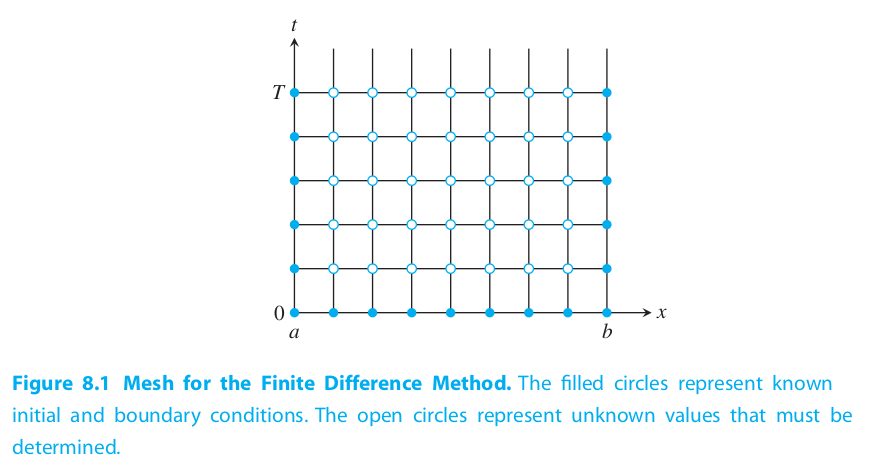

ie, an ODE may have independent variable $t$ for time while the PDE for heat has independent variables $t$ and $x$ for length.

FDM uses a grid of independent variables and approximates by discretizing PDE. ie, a continuous problem is approximated by a finite number of euqations. a linear PDE can be solved by the methods for systems of equations like gaussian elimination.
</br></br>

to discretize the heat equation on time interval $[0,T]$, consider a mesh of time with distance $x$ where number of steps $M,N$ such that $h = \frac{b-a}{M}$ and $k = \frac{T}{N}$.
</br></br>

$$u_{xx}(x,t) \approx \frac{1}{h^2}(u(x+h,t) - 2u(x,t) + u(x-h,t))$$
</br></br>

with error $\frac{h^2u_{xxxx}(c_1,t)}{12}$ and
</br></br>


$$u_t(x,t) \approx \frac{1}{k}(u(x,t+k) - u(x,t))$$
</br></br>

with error $\frac{ku_{tt}(x,c_2)}{2}$ where $x - h < c_1 < x + h$ and $t < c_2 < t + h$.
</br></br>

$$\Rightarrow \frac{D}{h^2}(w_{i+1} - 2w_{ij} + w_{i-1}) \approx \frac{1}{k}(w_{i,j+1} - w_{ij})$$
</br></br>

with local truncation error $\mathcal{O}(k) + \mathcal{O}(h^2)$.
</br></br>

given initial and boundary conditions $w_{i0}$ for $i=0,\dots,M$ and $w_{0j}$ for $j=0,\dots,N$
</br></br>

\begin{align}
  \Rightarrow\quad w_{i,j+1} &= w_{ij} + \frac{Dk}{h^2} (w_{i+1,j} - 2w{i,j} + w_{i-1,j}) \\
  &= \sigma w_{i+1,j} + (1-2\sigma)w_{ij} + \sigma w_{i-1,j}, \qquad \sigma = \frac{Dk}{h^2}
\end{align}
</br>


FDM is <b>explicit</b> if previous values determine forward values and <b>implicit</b> if estimates from the future are involved.
</br>


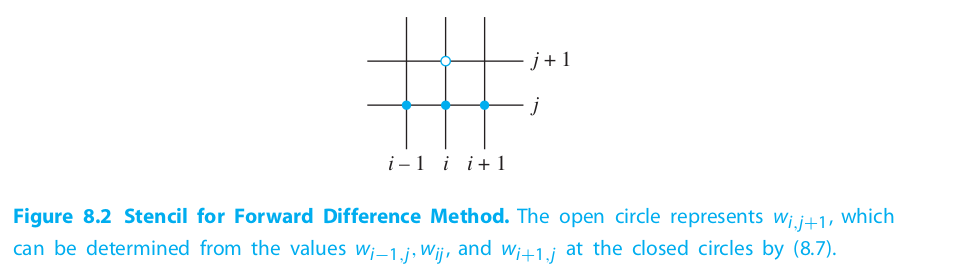

ie, $w_{i,j+1}$ at time $t_{j+1}$ from $w_{j+1} = Aw_j + s_j$
</br></br>

$$
\Rightarrow\qquad
\begin{bmatrix} w_{1,j+1} \\ \vdots \\ w_{m,j+1} \end{bmatrix}
=
\begin{bmatrix}
  1-2\sigma & \sigma & 0 & \dots & 0 \\
  \sigma & 1-2\sigma & \sigma & \ddots & \vdots \\
  0 & \sigma & 1-2\sigma & \ddots & 0 \\
  \vdots & \ddots & \ddots & \ddots & \sigma \\
  0 & \dots & 0 & \sigma & 1-2\sigma
\end{bmatrix}
\begin{bmatrix} w_{1,j} \\ \vdots \\ w_{m,j} \end{bmatrix}
+ \sigma
\begin{bmatrix} w_{0,j} \\ \vdots \\ w_{m+1,j} \end{bmatrix}
.$$
</br></br>

$A$ is $m\times m$ matrix where $m = M-1$ and right-most vector $s_j$ represents what happens at the ends of the rod.
</br>


consider $D = 1$ with initial condition $f(x) = sin^22\pi x$ and boundary conditions $u(0,t) = u(1,t) = 0$ for all $t$.
</br>


###### code, matlab


[matlab online](https://matlab.mathworks.com)
</br></br>


```
% Program 01 Forward difference method for heat equation
% input: space interval [xl,xr], time interval [yb,yt],
% number of space steps M, number of time steps N
% output: solution w
% Example usage: w=heatfd(0,1,0,1,10,250) % call by filename
function w=heatfd(xl,xr,yb,yt,M,N)
    f=@(x) sin(2*pi*x).^2;
    l=@(t) 0*t;
    r=@(t) 0*t;
    D=1; % diffusion coefficient
    h=(xr-xl)/M; k=(yt-yb)/N; m=M-1; n=N;
    sigma=D*k/(h*h);
    a=diag(1-2*sigma*ones(m,1))+diag(sigma*ones(m-1,1),1);
    a=a+diag(sigma*ones(m-1,1),-1); % define matrix a
    lside=l(yb+(0:n)*k); rside=r(yb+(0:n)*k);
    w(:,1)=f(xl+(1:m)*h)'; % initial conditions
    for j=1:n
        w(:,j+1)=a*w(:,j)+sigma*[lside(j);zeros(m-2,1);rside(j)];
    end
    w=[lside;w;rside]; % attach boundary conds
    x=(0:m+1)*h;t=(0:n)*k;
    mesh(x,t,w')
    % 3-D plot of solution w
    view(60,30);axis([xl xr yb yt -1 1])
end
```



###### code, python


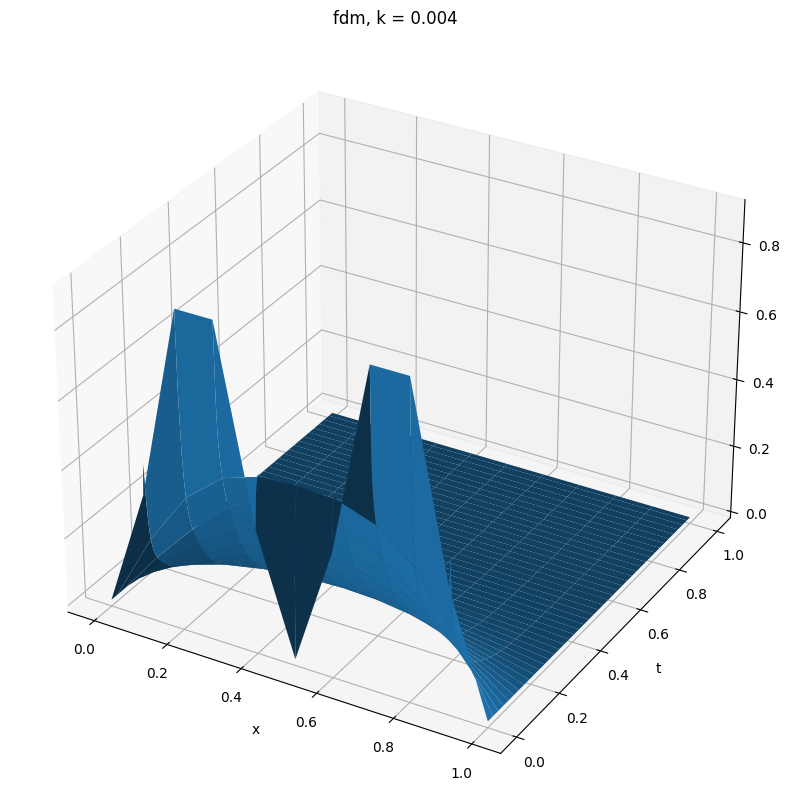

array([[0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [3.455e-01, 4.309e-01, 3.585e-01, 3.041e-01, 2.576e-01, 2.253e-01],
       [9.045e-01, 6.809e-01, 5.809e-01, 4.920e-01, 4.345e-01, 3.893e-01],
       [9.045e-01, 6.809e-01, 5.809e-01, 5.362e-01, 4.985e-01, 4.710e-01],
       [3.455e-01, 4.309e-01, 4.691e-01, 4.862e-01, 4.938e-01, 4.902e-01],
       [1.500e-32, 2.764e-01, 4.000e-01, 4.553e-01, 4.800e-01, 4.911e-01],
       [3.455e-01, 4.309e-01, 4.691e-01, 4.862e-01, 4.938e-01, 4.902e-01],
       [9.045e-01, 6.809e-01, 5.809e-01, 5.362e-01, 4.985e-01, 4.710e-01],
       [9.045e-01, 6.809e-01, 5.809e-01, 4.920e-01, 4.345e-01, 3.893e-01],
       [3.455e-01, 4.309e-01, 3.585e-01, 3.041e-01, 2.576e-01, 2.253e-01],
       [5.999e-32, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]])

In [ ]:
# program 01 FDM for heat

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# bvp
U = lambda x: pow(np.sin(2*np.pi*x),2)
BCL = lambda x,t: 0*t
BCR = lambda x,t: 0*t

# some parms
D = 1   # diffusion constant
M = 10  # subintervals, x
N = 250 # subintervals, t

# mesh
x,t = [0,1],[0,1]
h = (x[1]-x[0])/M # subinterval size, x
k = (t[1]-t[0])/N # subinterval size, t
m = M-1 # interior points [1,m]
n = N   # time steps [1,n] ~ [0,n); however, solution [0,n]
sigma = D*k/pow(h,2)

# DF for interior
a = np.zeros((m,m))
a.flat[0::m+1] = 1-2*sigma              # diagonal
a.flat[1::m+1] = a.flat[m::m+1] = sigma # offset

# approx soln, initialize
ws = np.zeros((m+2,n+1)) # [0:M,0:N]

# approx soln, bc
ts = np.linspace(t[0],t[1],n+1)
ws[0,:] = BCL(x[0],ts)
ws[m+1,:] = BCR(x[1],ts)

# approx soln, ic
xs = np.linspace(x[0],x[1],M+1)
ws[:,0] = U(xs) # ic

# approx soln, calc interior
for j in range(n): # [0,n)
  ws[1:m+1,j+1] = ws[1:m+1,j]
  ws[1,j+1] += sigma*ws[0,j]
  ws[m,j+1] += sigma*ws[m+1,j]
  ws[1:m+1,j+1] = np.dot(a,ws[1:m+1,j+1])

# plot some
x,y = np.meshgrid(xs,ts,indexing='ij') # yep its cartesian vs ij; will adj later
#fig,axs = plt.subplots(1,2,figsize=(10,10),subplot_kw={'projection':'3d'})
fig,axs = plt.subplots(1,1,figsize=(10,10),subplot_kw={'projection':'3d'})

axs.set_title("fdm, k = " + str(k))
#axs.plot_wireframe(x,y,ws)
axs.plot_surface(x,y,ws)
axs.set_xlabel("x")
axs.set_ylabel("t")
axs.set_zlabel("u")

plt.show()

np.set_printoptions(precision=3)
ws[0:11,0:6]


##### usw

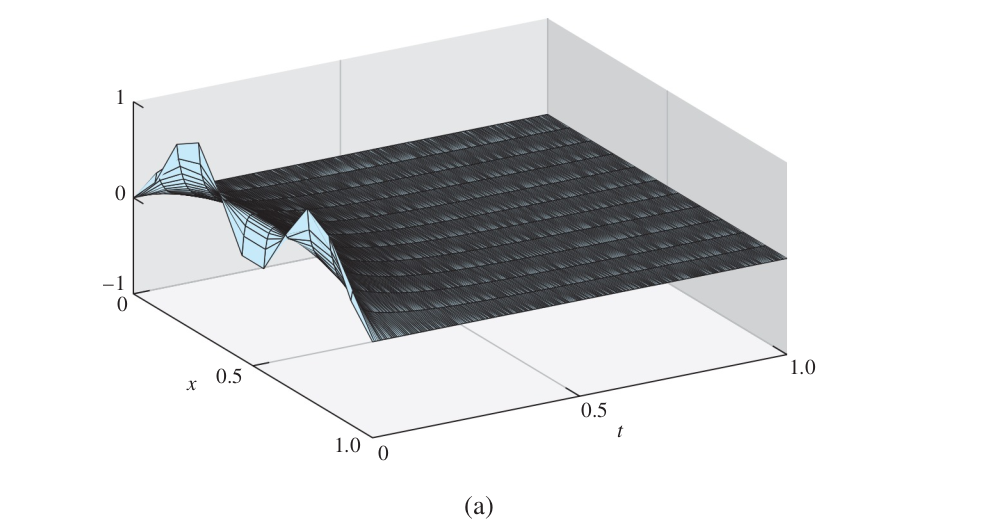

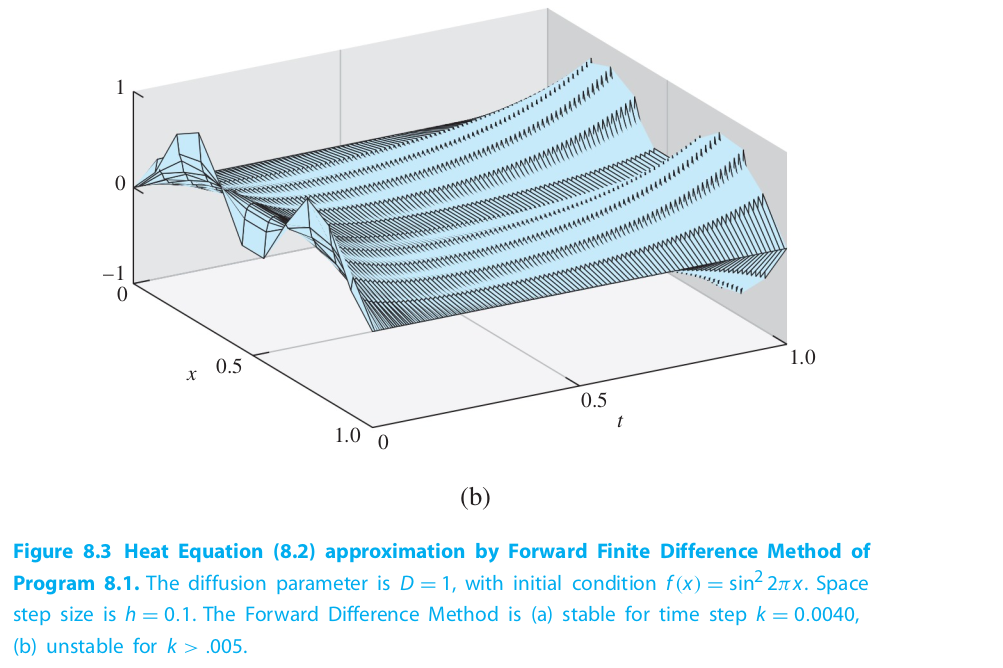

initial temperature peaks flatten towards zero with time but error aggregates, so mind step size $k$.
</br>


#### 8.1.2 FDM stability analysis


so theres error from discretization and theres error magnification. for the latter, use von neumann stability analysis addresses amplification. for a stable method, choose step size whose amplification factor is no larger than one.
</br></br>

let $y_j$ be the exact solution for $y_{j+1} = Ay_j + s_j$, $w_j$ be the computational approximation satisfying $w_{j+1} = Aw_j + s_j$. then
</br></br>

\begin{align}
  e_j = w_j - y_j &= Aw_{j-1} + s_{j-1} - (Ay_{j-1} + s_{j-1}) \\
  &= A(w_{j-1} - y_{j-1}) \\
  &= Ae_{j-1}.
\end{align}
</br>


suporting theorem: if $n\times n$ matrix $A$ has spectral radius $\rho(A) < 1$ and $b$ is arbitrary, then for any vector $x_0$ the iteration $x_{k+1} = A\,x_k + b$ converges. in fact, there exists a unique $x_*$ such that $\lim_{k\rightarrow\infty} x_k = x_*,\enspace x_* = A\,x_* + b$.
</br></br>

ie, to minimize $e_j$, require spectral radius $\rho(A) < 1$.
</br></br>

this limits $h,k$ and those limits need more information on the eigenvalues of the symmetric diagonal matrices.
</br>


##### <b><font color=grey>theorem 01</font></b>


the eigenvectors of $T$ are vectors $v_j$ for $j=1,\dots,m$ with corresponding eigenvalues $\lambda_j = 1-2cos\pi j/(m+1)$.
</br></br>

$$
T = \quad
\begin{bmatrix}
  1 & -1 & 0 & \dots & 0 \\
  -1 & 1 & -1 & \ddots & \vdots \\
  0 & -1 & 1 & \ddots & 0 \\
  \vdots & \ddots & \ddots & \ddots & -1 \\
  0 & \dots & 0 & -1 & 1
\end{bmatrix}
.$$
</br>


###### proof


from trig for integer $i$ and real number $x$,
</br></br>

\begin{align}
  sin(i-1)x &= sinixcosx - cosixsinx \\
  sin(i+1)x &= sinixcosx + consixsinx \\
  \\
  \Downarrow\quad & \\
  \\
  sin(i-1)x + sin(i+1)x &= 2sinixcosx \\
  \\
  \Downarrow\quad & \\
  \\
  -sin(i-1)x + sinix - sin(i+1)x &= (1-2cosx)sinix \\
  \\
  \Downarrow\quad & \\
  \\
  v_j &= \left[ sin\frac{\pi j}{m+1},sin\frac{2\pi j}{m+1},\dots,sin\frac{m\pi j}{m+1} \right]. \\
  \\
  \Downarrow\quad & \\
  \\
  x = \frac{\pi j}{m+1} \quad\Rightarrow\quad Tv_j &= \left( 1-2cos\frac{\pi j}{m+1} \right)v_j, \quad j = 1,\dots,m. \blacksquare
\end{align}
</br>


##### usw


theorem 01 can be used to find the eigenvalues of any symmetric tridiagonal matrix whose main diagonal and superdiagonal are constant.
</br></br>

eg, for the heat equation of this section, matrix $A = -\sigma T + (1-\sigma)I$ has eigenvalues
</br></br>

$$-\sigma(1-2 cos\frac{\pi j}{m+1})+ (1-\sigma) = \sigma (cos\frac{\pi j}{m+1} - 1) + 1, \quad j=1,\dots\,m.$$
</br>

apply theorem for spectral radius, convergence. bc $-2 < cosx - 1 < 0$ for $x = \frac{\pi j}{m + 1}$ where $1\le j\le m$, the eigenvalues of $A \in [-4\sigma + 1,1]$. assume diffusion coefﬁcient $D > 0$, then restrict $\sigma < \frac{1}{2}$ to ensure that $\rho(A) < 1$.
</br>


##### <b><font color=grey>theorem 02</font> FDM stability</b>


let $h$ be the space step and $k$ be the time step for FDM applied to heat equation with $D>0$. if $\frac{Dk}{h^2} < \frac{1}{2}$, FDM is stable.
</br>


#### 8.1.3 backward difference method


implicit, surprise. replace $u_{xx}$ with the backward-difference formula (vs the centered-difference formula).
</br></br>

\begin{align}
  u_t &= \frac{1}{k}(u(x,t) - u(x,t-k)) + \frac{k}{2}u_{tt}(x,c_0),\quad t-k < c_0 < t \\
  \\
  &\quad\Downarrow \\
  \\
  \frac{1}{k}(w_{ij}-w_{i,j-1} &= \frac{D}{h^2} (w_{i+1,j} - 2w_{ij} + w_{i-1,j}, \quad e_j = \mathcal{O}(k) + \mathcal{O}(h^2) \\
  \\
  &\quad\Downarrow \\
  -\sigma w_{i+1,j} + (1+2\sigma)w_{ij} &= w_{i,j-1}, \quad \sigma = \frac{Dk}{h^2} \\
  \\
  &\quad\Downarrow \\
\end{align}
</br>

$$
\begin{bmatrix}
  1+2\sigma & -\sigma & 0 & \dots & 0 \\
  -\sigma & 1+2\sigma & -\sigma & \ddots & \vdots \\
  0 & -\sigma & 1+2\sigma & \ddots & 0 \\
  \vdots & \ddots & \ddots & \ddots & -\sigma \\
  0 & \dots & 0 & -\sigma & 1+2\sigma
\end{bmatrix}
\begin{bmatrix} w_{1,j} \\ \vdots \\ w_{m,j} \end{bmatrix}
=
\begin{bmatrix} w_{1,j-1} \\ \vdots \\ w_{m,j-1} \end{bmatrix}
+ \sigma
\begin{bmatrix} w_{0,j} \\ 0 \\ \vdots \\ 0 \\ w_{m+1,j} \end{bmatrix}
.$$
</br>


###### code, matlab


[matlab online](https://matlab.mathworks.com)
</br></br>


```
% Program 02 Backward difference method for heat equation
% input: space interval [xl,xr], time interval [yb,yt],
% number of space steps M, number of time steps N
% output: solution w
% Example usage: w=heatbd(0,1,0,1,10,10)
function w=heatbd(xl,xr,yb,yt,M,N)
    f=@(x) sin(2*pi*x).^2;
    l=@(t) 0*t;
    r=@(t) 0*t;
    D=1; % diffusion coefficient
    h=(xr-xl)/M; k=(yt-yb)/N; m=M-1; n=N;
    sigma=D*k/(h*h);
    a=diag(1+2*sigma*ones(m,1))+diag(-sigma*ones(m-1,1),1);
    a=a+diag(-sigma*ones(m-1,1),-1); % define matrix a
    lside=l(yb+(0:n)*k); rside=r(yb+(0:n)*k);
    w(:,1)=f(xl+(1:m)*h)'; % initial conditions
    for j=1:n
      w(:,j+1)=a\(w(:,j)+sigma*[lside(j);zeros(m-2,1);rside(j)]);
    end
    w=[lside;w;rside]; % attach boundary conds
    x=(0:m+1)*h;t=(0:n)*k;
    mesh(x,t,w')
    % 3-D plot of solution w
    view(60,30);axis([xl xr yb yt -1 2])
end
```



###### code, python


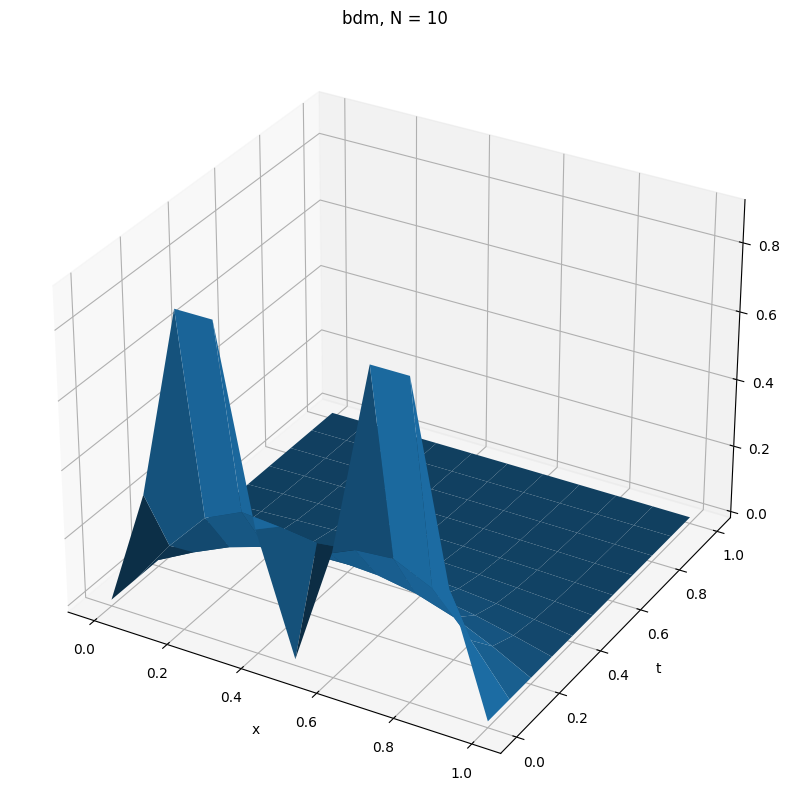

array([[0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [3.455e-01, 1.370e-01, 5.769e-02, 2.757e-02, 1.375e-02, 6.926e-03],
       [9.045e-01, 2.532e-01, 1.074e-01, 5.213e-02, 2.611e-02, 1.317e-02],
       [9.045e-01, 3.042e-01, 1.426e-01, 7.116e-02, 3.587e-02, 1.812e-02],
       [3.455e-01, 2.951e-01, 1.617e-01, 8.303e-02, 4.210e-02, 2.129e-02],
       [1.500e-32, 2.811e-01, 1.674e-01, 8.705e-02, 4.424e-02, 2.239e-02],
       [3.455e-01, 2.951e-01, 1.617e-01, 8.303e-02, 4.210e-02, 2.129e-02],
       [9.045e-01, 3.042e-01, 1.426e-01, 7.116e-02, 3.587e-02, 1.812e-02],
       [9.045e-01, 2.532e-01, 1.074e-01, 5.213e-02, 2.611e-02, 1.317e-02],
       [3.455e-01, 1.370e-01, 5.769e-02, 2.757e-02, 1.375e-02, 6.926e-03],
       [5.999e-32, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]])

In [ ]:
# program 02 BDM for heat ~ adjusted from program 01 obviously

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# bvp
U = lambda x: pow(np.sin(2*np.pi*x),2)
BCL = lambda x,t: 0*t
BCR = lambda x,t: 0*t

# some parms
D = 1  # diffusion constant

# mesh
x,t = [0,1],[0,1]
h = k = 0.1              ## <- change here (for problem statement)
M = round((x[1]-x[0])/h) ## <- change here (")
N = round((t[1]-t[0])/k) ## <- change here (")
m = M-1 # interior points [1,m]
n = N   # time steps [1,n] ~ [0,n); however, solution [0,n]
sigma = D*k/pow(h,2)

# DF for interior
a = np.zeros((m,m))
a.flat[0::m+1] = 1+2*sigma               # diagonal ## <- change here
a.flat[1::m+1] = a.flat[m::m+1] = -sigma # offset   ## <- change here

# approx soln, initialize
ws = np.zeros((m+2,n+1)) # [0:M,0:N]

# approx soln, bc
ts = np.linspace(t[0],t[1],n+1)
ws[0,:] = BCL(x[0],ts)
ws[m+1,:] = BCR(x[1],ts)

# approx soln, ic
xs = np.linspace(x[0],x[1],M+1)
ws[:,0] = U(xs) # ic

# approx soln, calc interior
for j in range(n): # [0,n) ## vv change here vv
  ws[1:m+1,j+1] = ws[1:m+1,j]
  ws[1,j+1] += sigma*ws[0,j]
  ws[m,j+1] += sigma*ws[m+1,j]
  ws[1:m+1,j+1] = np.dot(np.linalg.inv(a),ws[1:m+1,j+1])

# plot some
x,y = np.meshgrid(xs,ts,indexing='ij') # yep its cartesian vs ij; will adj later
#fig,axs = plt.subplots(1,2,figsize=(10,10),subplot_kw={'projection':'3d'})
fig,axs = plt.subplots(1,1,figsize=(10,10),subplot_kw={'projection':'3d'})

axs.set_title("bdm, N = " + str(N))
#axs.plot_wireframe(x,y,ws)
axs.plot_surface(x,y,ws)
axs.set_xlabel("x")
axs.set_ylabel("t")
axs.set_zlabel("u")

plt.show()

np.set_printoptions(precision=3)
ws[0:11,0:6]


##### example 01


apply BDM.
</br></br>

\begin{align}
  \text{example 01} \quad
  \left\{ \quad
    \begin{array}{l}
      u_t = Du_{xx} &\qquad 0\le x\le 1,t\ge 0,D=1 \\
      u(x,0) = sin^22\pi x &\qquad 0\le x\le 1 \\
      u(0,t) = 0 &\qquad t\ge 0 \\
      u(1,t) = 0 &\qquad t\ge 0
    \end{array}
  \right.
\end{align}
</br>


use $h = k = 1$. which is the same as the program 2 code but with flipped dependencies for flexible $h,k$.
</br>


##### usw


why is $N$ so much smaller? as with the von neumann stability analysis of FDM, the relevant quantites are the eigenvalues of $A^{-1}$. matrix $A = \sigma T + (1+\sigma)I$ has eigenvalues
</br></br>

$$\sigma(1-2 cos\frac{\pi j}{m+1})+ (1+\sigma) = 1 + 2\sigma(1 - cos\frac{\pi j}{m+1}), \quad j=1,\dots\,m.$$
</br>

so for $\rho(A^{-1}) < 1$,
</br></br>

$$|1+2\sigma(1-cosx)| > 1$$
</br>

which is true for all $\sigma$ bc $1-cosx>0$ and $\sigma = \frac{Dk}{h^2} > 0$. therefore step size depends on local truncation error.
</br>


##### <b><font color=grey>theorem 03</font> BDM stability</b>


let $h$ be space step and $k$ be time step for BDM applied to heat equation with $D>0$. then for any $h,k$ BDM is stable.
</br>


##### example 02


apply BDM.
</br></br>

\begin{align}
  \text{example 02} \quad
  \left\{ \quad
    \begin{array}{l}
      u_t = Du_{xx} &\qquad 0\le x\le 1,t\ge 0,D=4 \\
      u(x,0) = e^{-\frac{x}{2}} &\qquad 0\le x\le 1 \\
      u(0,t) = e^t &\qquad t\ge 0 \\
      u(1,t) = e^{t-\frac{1}{2}} &\qquad t\ge 0
    \end{array}
  \right.
\end{align}
</br>

use $h = k = 0.1$. which is the same as the program 2 code but with flipped dependencies for flexible $h,k$.
</br>


###### code, matlab


[matlab](https://matlab.mathworks.com)
</br></br>

```
% Program 02 Backward difference method for heat equation
% input: space interval [xl,xr], time interval [yb,yt],
% number of space steps M, number of time steps N
% output: solution w
% Example usage: w=heatbd(0,1,0,1,10,10)
function w=heatbd(xl,xr,yb,yt,M,N)
    f=@(x,t) exp(-x/2);
    l=@(t) exp(t);
    r=@(t) exp(t-1/2);
    D=4; % diffusion coefficient
    h=(xr-xl)/M; k=(yt-yb)/N; m=M-1; n=N;
    sigma=D*k/(h*h);
    a=diag(1+2*sigma*ones(m,1))+diag(-sigma*ones(m-1,1),1);
    a=a+diag(-sigma*ones(m-1,1),-1); % define matrix a
    lside=l(yb+(0:n)*k); rside=r(yb+(0:n)*k);
    w(:,1)=f(xl+(1:m)*h)'; % initial conditions
    for j=1:n
      w(:,j+1)=a\(w(:,j)+sigma*[lside(j);zeros(m-2,1);rside(j)]);
    end
    w=[lside;w;rside]; % attach boundary conds
    x=(0:m+1)*h;t=(0:n)*k;
    mesh(x,t,w')
    % 3-D plot of solution w
    view(60,30);axis([xl xr yb yt -1 2])
end
```



###### code, python


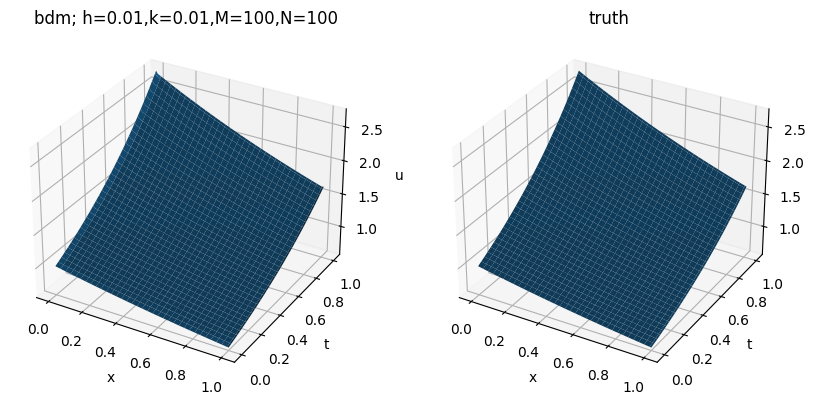

In [ ]:
# example 02 ~ adjusted from program 02

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# actual
U_act = lambda x,t: np.exp(t-x/2)

# bvp
U = lambda x: np.exp(-x/2)
BCL = lambda x,t: np.exp(t)
BCR = lambda x,t: np.exp(t-1/2)

# some parms
D = 4  # diffusion constant

# mesh
x,t = [0,1],[0,1]
h = k = 0.1              ## <- change here (for problem statement)
M = round((x[1]-x[0])/h) ## <- change here (")
N = round((t[1]-t[0])/k) ## <- change here (")
m = M-1 # interior points [1,m]
n = N   # time steps [1,n] ~ [0,n); however, solution [0,n]
sigma = D*k/pow(h,2)

# DF for interior
a = np.zeros((m,m))
a.flat[0::m+1] = 1+2*sigma               # diagonal ## <- change here
a.flat[1::m+1] = a.flat[m::m+1] = -sigma # offset   ## <- change here

# approx soln, initialize
ws = np.zeros((m+2,n+1)) # [0:M,0:N]

# approx soln, bc
ts = np.linspace(t[0],t[1],n+1)
ws[0,:] = BCL(x[0],ts)
ws[m+1,:] = BCR(x[1],ts)

# approx soln, ic
xs = np.linspace(x[0],x[1],M+1)
ws[:,0] = U(xs) # ic

# approx soln, calc interior
for j in range(n): # [0,n) ## vv change here vv
  ws[1:m+1,j+1] = ws[1:m+1,j]
  ws[1,j+1] += sigma*ws[0,j]    # bc1 not homogeneous
  ws[m,j+1] += sigma*ws[m+1,j]  # bc2 not homogeneous
  ws[1:m+1,j+1] = np.dot(np.linalg.inv(a),ws[1:m+1,j+1])

# plot some
x,y = np.meshgrid(xs,ts,indexing='ij') # yep its cartesian vs ij; will adj later
fig,axs = plt.subplots(1,2,figsize=(10,10),subplot_kw={'projection':'3d'})

axs[0].set_title("bdm; h="+str(h)+",k=" + str(k)+",M="+str(M)+",N="+str(N))
#axs[0].plot_wireframe(x,y,ws)
axs[0].plot_surface(x,y,ws)
axs[0].set_xlabel("x")
axs[0].set_ylabel("t")
axs[0].set_zlabel("u")

ys = U_act(x,y)
axs[1].set_title("truth")
axs[1].plot_surface(x,y,ys)
axs[1].set_xlabel("x")
axs[1].set_ylabel("t")
axs[1].set_zlabel("u")

plt.show()

if False:
  np.set_printoptions(precision=3)
  ws[0:M+1,0:6]


##### usw

recall local truncation error, $e_j = \mathcal{O}(k) + \mathcal{O}(h^2)$. for small $h\approx k$, time step size $k$ will dominate space step size $h$. ie, $\mathcal{O}(k) + \mathcal{O}(h^2) \approx \mathcal{O}(k)$.
</br>


types of boundary conditions. if, for the heat equation, temperatures are given, that would be a [<b>dirichlet</b> boundary condition](https://en.wikipedia.org/wiki/Dirichlet_boundary_condition). if the boundary is insulated, then a [<b>neumann</b> boundary condition](https://en.wikipedia.org/wiki/Neumann_boundary_condition) gives the value of a derivative at the boundary. eg, requiring $u_x(a,t) = u_x(b,t) = 0$ for all $t$ corresponds to an insulated boundary. in general, boundaries set to zero are <b>homogeneous</b> boundary conditions.
</br>


##### example 03


apply BDM to heat equation with homogeneous neumann boundary conditions.
</br></br>

\begin{align}
  \text{example 03} \quad
  \left\{ \quad
    \begin{array}{l}
      u_t = Du_{xx} &\qquad 0\le x\le 1,t\ge 0,D=1 \\
      u(x,0) = sin^22\pi x &\qquad 0\le x\le 1 \\
      u(0,t) = 0 &\qquad t\ge 0 \\
      u(1,t) = 0 &\qquad t\ge 0
    \end{array}
  \right.
\end{align}
</br>

second-order approximations from ch 5 (bc function values from both sides of x are not available),
</br></br>

\begin{align}
  f'(x) &= \frac{-3f(x) + 4f(x+h) - f(x+2h)}{2h}+\mathcal{O}(h^2). \\
  \\
  &\quad \Downarrow \\
  \\
  u_x(0,t) &\approx \frac{-3u(0,t) + 4u(0+h,t) - u(0+2h,t)}{2h} \\
  u_x(1,t) &\approx \frac{-u(1-2h,t) + 4u(1-h,t) - u(1,t)}{2h} \\
  \\
  &\quad \Downarrow \\
  \\
  & -3w_0 + 4w_1 - w_2 = 0 \\
  & -w_{M-2} + 4w_{M-1} - 3w_M = 0
\end{align}
</br>

with neumann, $A_{m\times m} \rightarrow A_{M+1\times M+1}$ with the first and last euqations replaced by neumann conditions $w_0,w_M$.
</br>


###### code, matlab


[matlab online](https://matlab.mathworks.com)
</br></br>


```
% Program 03 Backward difference method for heat equation
% with Neumann boundary conditions
% input: space interval [xl,xr], time interval [yb,yt],
% number of space steps M, number of time steps N
% output: solution w
% Example usage: w=heatbdn(0,1,0,1,20,20)
function w=heatbdn(xl,xr,yb,yt,M,N)
    f=@(x) sin(2*pi*x).^2;
    D=1; % diffusion coefficient
    h=(xr-xl)/M; k=(yt-yb)/N; m=M+1; n=N;
    sigma=D*k/(h*h);
    a=diag(1+2*sigma*ones(m,1))+diag(-sigma*ones(m-1,1),1);
    a=a+diag(-sigma*ones(m-1,1),-1); % define matrix a
    a(1,:)=[-3 4 -1 zeros(1,m-3)]; % Neumann conditions
    a(m,:)=[zeros(1,m-3) -1 4 -3];
    w(:,1)=f(xl+(0:M)*h)'; % initial conditions
    for j=1:n
        b=w(:,j);b(1)=0;b(m)=0;
        w(:,j+1)=a\b;
        if j==10
            disp(w(:,j+1))
        end
    end
    x=(0:M)*h;t=(0:n)*k;
    mesh(x,t,w')
    % 3-D plot of solution w
    view(60,30);axis([xl xr yb yt -1 1])
end
```



###### code, python


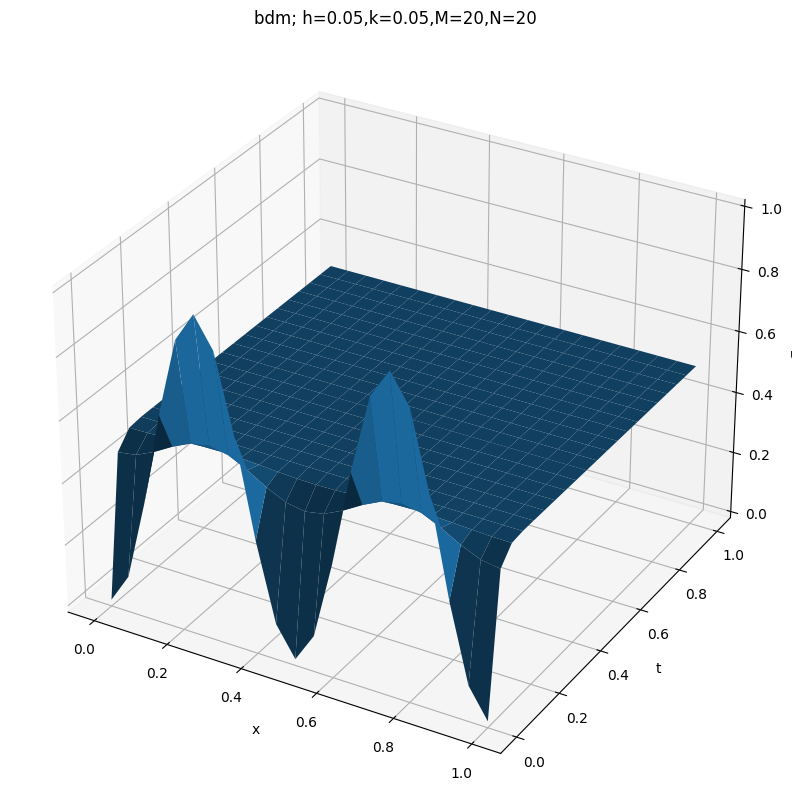

In [ ]:
# eg 03 ~ adjusted from program 02

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# bvp
U = lambda x: pow(np.sin(2*np.pi*x),2)
BCL = lambda x,t: 0*t
BCR = lambda x,t: 0*t

# some parms
D = 1  # diffusion constant

# mesh
x,t = [0,1],[0,1]
M = N = 20
h = (x[1]-x[0])/M
k = (t[1]-t[0])/N
m = M+1 # all points [0,M]
n = N   # time steps [1,n] ~ [0,n); however, solution [0,n]
sigma = D*k/pow(h,2)

# DF for interior
a = np.zeros((m,m))
a.flat[0::m+1] = 1+2*sigma               # diagonal ## <- change here
a.flat[1::m+1] = a.flat[m::m+1] = -sigma # offset   ## <- change here
a[  0,0:3] = [-3,4,-1]  # neumann conditions at t=0
a[m-1,-3:] = [-1,4,-3]  # neumann conditions at t=1

# approx soln, initialize
ws = np.zeros((M+1,N+1)) # [0:M,0:N]

# approx soln, bc
ts = np.linspace(t[0],t[1],n+1)
ws[0,:] =   BCL(x[0],ts) # yeah, homogeneous but its already there
ws[m-1,:] = BCR(x[1],ts) # yeah, homogeneous but its already there

# approx soln, ic
xs = np.linspace(x[0],x[1],M+1)
ws[:,0] = U(xs) # ic

# approx soln, calc interior
for j in range(n): # [0,n) ## vv change here vv
  ws[1:m-1:,j+1] = ws[1:m-1,j]
  ws[:,j+1] = np.dot(np.linalg.inv(a),ws[:,j+1])

# plot some
x,y = np.meshgrid(xs,ts,indexing='ij') # yep its cartesian vs ij; will adj later
fig,axs = plt.subplots(1,1,figsize=(10,10),subplot_kw={'projection':'3d'})

axs.set_title("bdm; h="+str(h)+",k=" + str(k)+",M="+str(M)+",N="+str(N))
#axs.plot_wireframe(x,y,ws)
axs.plot_surface(x,y,ws)
axs.set_xlabel("x")
axs.set_ylabel("t")
axs.set_zlabel("u")

plt.show()


##### usw

note: with neumann conditions, the boundary values are not fixed at zero but the solution floats to meet the value of the initial data.
</br>


#### 8.1.4 crank-nicolson


so for parabolic PDEs, explicit is sometimes stable and implicit is always stable and both have error $\mathcal{O}(k+h^2)$ when stable and both need small time step $k$ for accuracy. CN uses the backwards-forward difference formula, surprise, is unconditionally stable and has error $\mathcal{O}(h^2) + \mathcal{O}(k^2)$.
</br></br>

eg, for the heat equation, replace $u_t$ with the backward difference formula
</br></br>

$$\frac{1}{k} (w_{ij} - w_{i,j-1})$$
</br>

and $u_{xx}$ with the mixed difference
</br></br>

$$\frac{1}{2} \left( \frac{w_{i+1,j} - 2w_{ij} + w_{i-1,j}}{h^2} \right) + \frac{1}{2} \left( \frac{w_{i+1,j-1} - 2w_{i,j-1} + w_{i-1,j-1}}{h^2} \right).$$
</br>

with $\sigma = \frac{Dk}{h^2}$
</br></br>

\begin{align}
  2w_{ij} - 2w_{i,j-1} &= \sigma[ w_{i+1,j} - 2w_{ij} + w_{i-1,j} + w_{i+1,j-1} - 2w_{i,j-1} + w_{i-1,j-1} ] \\
  \\
  &\quad\Downarrow \\
  \\
  -\sigma w_{i-1,j} + (2+2\sigma)w_{ij} - \sigma w_{i+1,j} &= \sigma w_{i-1,j-1} + (2-2\sigma)w_{i,j-1} + \sigma w_{i+1,j-1}.
\end{align}
</br>



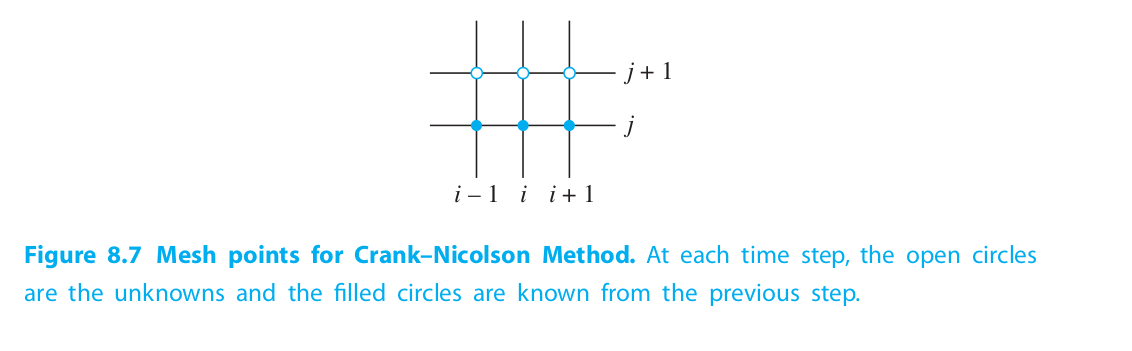

in matrix form, $Aw_j = Bw_{j-1} + \sigma (s_{j-1}+s_j), \quad w_j = [ w_{1j},\dots ,w_{mj}]^T$ where
</br></br>

$$
A =
\begin{bmatrix}
  2+2\sigma & -\sigma & 0 & \dots & 0 \\
  -\sigma & 2+2\sigma & -\sigma & \ddots & \vdots \\
  0 & -\sigma & 2+2\sigma & \ddots & 0 \\
  \vdots & \ddots & \ddots & \ddots & -\sigma \\
  0 & \dots & 0 & -\sigma & 2+2\sigma
\end{bmatrix}
, \quad B =
\begin{bmatrix}
  2-2\sigma & \sigma & 0 & \dots & 0 \\
  \sigma & 2-2\sigma & \sigma & \ddots & \vdots \\
  0 & \sigma & 2-2\sigma & \ddots & 0 \\
  \vdots & \ddots & \ddots & \ddots & \sigma \\
  0 & \dots & 0 & \sigma & 2-2\sigma
\end{bmatrix}
,$$
</br>

and $s_j = [w_{0j},0,\dots ,0,w_{m+1,j}]^T$.
</br>


###### code, matlab



[matlab online](https://matlab.mathworks.com)
</br></br>

```
% Program 04 Crank-Nicolson method
% with Dirichlet boundary conditions
% input: space interval [xl,xr], time interval [yb,yt],
% number of space steps M, number of time steps N
% output: solution w
% Example usage: w=crank(0,1,0,1,10,10)
function w=crank(xl,xr,yb,yt,M,N)
    f=@(x) sin(2*pi*x).^2;
    l=@(t) 0*t;
    r=@(t) 0*t;
    D=1; % diffusion coefficient
    h=(xr-xl)/M;k=(yt-yb)/N; % step sizes
    sigma=D*k/(h*h); m=M-1; n=N;
    a=diag(2+2*sigma*ones(m,1))+diag(-sigma*ones(m-1,1),1);
    a=a+diag(-sigma*ones(m-1,1),-1); % define tridiagonal matrix a
    b=diag(2-2*sigma*ones(m,1))+diag(sigma*ones(m-1,1),1);
    b=b+diag(sigma*ones(m-1,1),-1); % define tridiagonal matrix b
    lside=l(yb+(0:n)*k); rside=r(yb+(0:n)*k);
    w(:,1)=f(xl+(1:m)*h)'; % initial conditions
    for j=1:n
        sides=[lside(j)+lside(j+1);zeros(m-2,1);rside(j)+rside(j+1)];
        w(:,j+1)=a\(b*w(:,j)+sigma*sides);
    end
    w=[lside;w;rside];
    x=xl+(0:M)*h;t=yb+(0:N)*k;
    mesh(x,t,w');
    view (60,30); axis([xl xr yb yt -1 1])
end
```



###### code, python


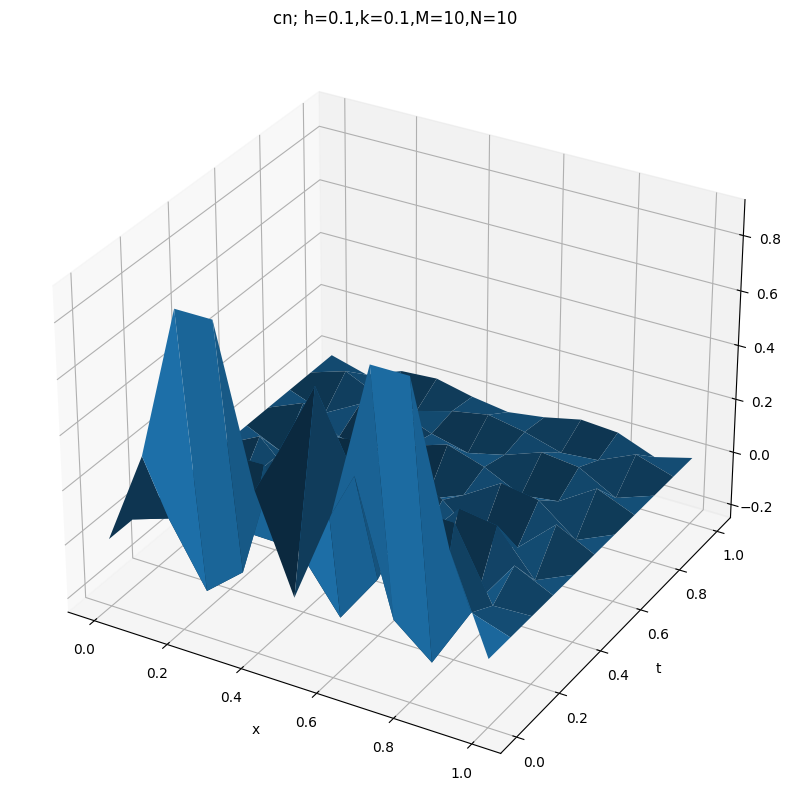

In [ ]:
# program 04 ~ crank-nicolson, adjusted from previous

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# bvp
U = lambda x: pow(np.sin(2*np.pi*x),2)
BCL = lambda x,t: 0*t
BCR = lambda x,t: 0*t

# some parms
D = 1  # diffusion constant

# mesh
x,t = [0,1],[0,1]
M,N = 10,10
h = (x[1]-x[0])/M
k = (t[1]-t[0])/N
m = M-1 # interior points [1,m]
n = N   # time steps [1,n] ~ [0,n); however, solution [0,n]
sigma = D*k/pow(h,2)

# DF for interior
a = np.zeros((m,m))
a.flat[0::m+1] = 2+2*sigma
a.flat[1::m+1] = a.flat[m::m+1] = -sigma
b = np.zeros((m,m))
b.flat[0::m+1] = 2-2*sigma
b.flat[1::m+1] = b.flat[m::m+1] =  sigma

# approx soln, initialize
ws = np.zeros((M+1,N+1)) # [0:M,0:N]

# approx soln, bc
ts = np.linspace(t[0],t[1],n+1)
ws[0,:] = BCL(x[0],ts)
ws[M,:] = BCR(x[1],ts)

# approx soln, ic
xs = np.linspace(x[0],x[1],M+1)
ws[:,0] = U(xs) # ic

# approx soln, calc interior % w(:,j+1)=a\(b*w(:,j)+sigma*sides);
for j in range(n):
  ws[1:m+1,j+1] = ws[1:m+1,j]
  ws[1:m+1,j+1] = np.dot(b,ws[1:m+1,j+1])
  ws[1,j+1] += sigma*(ws[  0,j]+ws[  0,j+1])
  ws[m,j+1] += sigma*(ws[m+1,j]+ws[m+1,j+1])
  ws[1:m+1,j+1] = np.dot(np.linalg.inv(a),ws[1:m+1,j+1])

# plot some
x,y = np.meshgrid(xs,ts,indexing='ij')
fig,axs = plt.subplots(1,1,figsize=(10,10),subplot_kw={'projection':'3d'})

axs.set_title("cn; h="+str(h)+",k=" + str(k)+",M="+str(M)+",N="+str(N))
#axs.plot_wireframe(x,y,ws)
axs.plot_surface(x,y,ws)
axs.set_xlabel("x")
axs.set_ylabel("t")
axs.set_zlabel("u")

plt.show()


##### usw

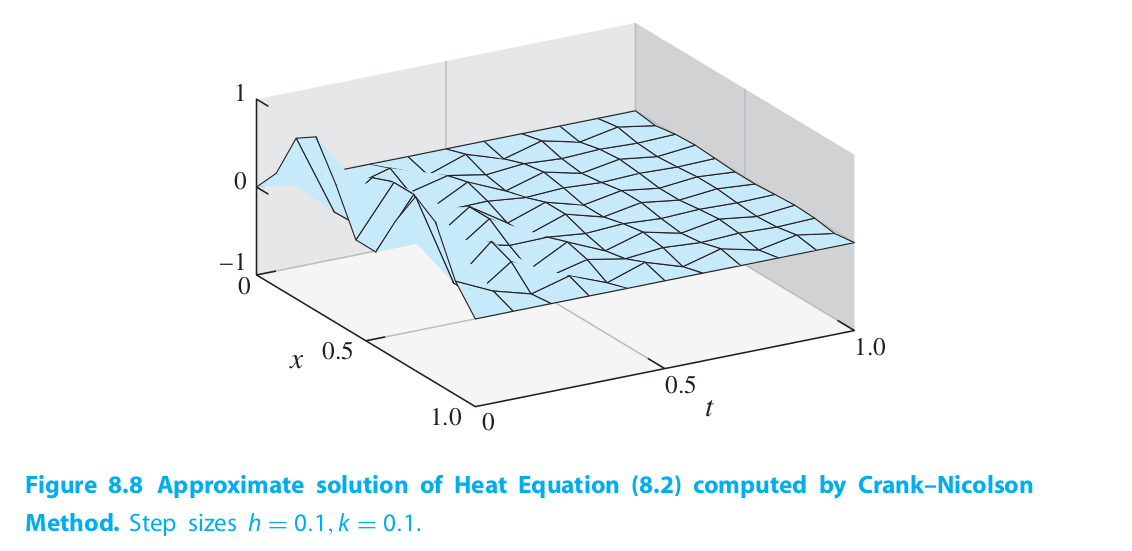

the von neumann stability analysis of CN, the relevant quantites are the eigenvalues of $A^{-1}B$. matrix $A = \sigma T + (2+\sigma)I$, matrix $B = -\sigma T + (2-\sigma)I$ for $j$th eigenvector $v_j$ of $T$,
</br></br>

\begin{align}
  A^{-1}Bv_j &= (\sigma T + (2+\sigma)I)^{-1} + (-\sigma\lambda_jv_j
 + (2-\sigma)v_j) \\
   &= \frac{1}{\sigma\lambda_j + 2 + \sigma}(-\sigma\lambda_j + 2 - \sigma)v_j
 \end{align}
 </br>

where $\lambda_j$ is the eigenvalue of $T$ associated with $v_j$. the eigenvalues of $A^{-1}B are$
</br></br>

$$\frac{-\sigma\lambda_j + 2 - \sigma}{\sigma\lambda_j + 2 + \sigma} = \frac{4-(\sigma(\lambda_j + 1)+2}{\sigma(\lambda_j + 1) + 2} = \frac{4}{L} - 1,$$
</br>

where $L = \sigma(\lambda_j+1)+2 > 2$ since $\lambda_j > -1$. therefore the eignevalues are between $-1$ and $1$. ie, CN is unconditionally stable like implicit FDM.
</br></br>

however it is not straightforward to derive $u_t$ bc for the wave equation - and poissons equation - only second order derivatives appear.
</br>


##### <b><font color=grey>theorem 04</font></b>


CN applied to the heat equation with $D>0$ is stable for any step sizes $h,k>0$.

###### CN truncation error, $\mathcal{O}(h^2) + \mathcal{O}(k^2),$ derivation


assume the existence of higher and partial derivatives of $u$ as needed. and previously,
</br></br>

1) $u_t(x,t)$, backward-difference
</br></b>

$$u_t(x,t) = \frac{u(x,t) - u(x,t-k)}{k} + \frac{k}{2!}u_{tt}(x,t) - \frac{k^2}{3!}u_{ttt}(x,t_1), \quad t-k < t_1<t;$$
</br>

2,3) $u_{xx}(x,t)$ and $u_{xx}(x,t-k)$, centered-difference
</br></br>

\begin{align}
  u_{xx}(x,t-k) &= u_{xx}(x,t) - ku_{xxt}(x,t) + \frac{k^2}{2}u_{xxtt}(x,t_2), \quad t-k<t_2<t \\
  \Rightarrow u_{xx}(x,t) &= u_{xx}(x,t-k) + ku_{xxt}(x,t) - \frac{k^2}{2}u_{xxtt}(x,t_2) \\
  \\
  &\quad\Downarrow \\
  \\
  u_{xx}(x,t) &= \frac{u(x+h,t) - 2u(x,t) + u(x-h,t)}{h^2} + \frac{h^2}{2*3!}u_{xxxx}(x_1,t), \quad x<x_1<x+h \\
  u_{xx}(x,t-k) &= \frac{u(x+h,t-k) - 2u(x,t-k) + u(x-h,t-k)}{h^2} + \frac{h^2}{2*3!}u_{xxxx}(x_1,t-k), \quad x<x_2<x+h
\end{align}
</br>

which slot into this incarnation of
</br></br>

4) the heat equation
</br></br>

$$u_t = D \left( \frac{1}{2}u_{xx} + \frac{1}{2}u_{xx} \right).$$
</br>

$$\Downarrow$$
</br>

$\qquad\qquad\qquad\qquad \frac{u(x,t) - u(x,t-k)}{k} + \frac{k}{2!}u_{tt}(x,t) - \frac{k^2}{3!}u_{ttt}(x,t_1) =$</br></br>
$\qquad\qquad\qquad\qquad\qquad\qquad \frac{D}{2} \left[ \frac{u(x+h,t) - 2u(x,t) + u(x-h,t)}{h^2} + \frac{h^2}{2*3!}u_{xxxx}(x_1,t) \right]$</br></br>
$\qquad\qquad\qquad\qquad\qquad\qquad + \frac{D}{2}\left[ \frac{u(x+h,t-k) - 2u(x,t-k) + u(x-h,t-k)}{h^2} + \frac{h^2}{2*3!}u_{xxxx}(x_1,t-k) \right.$</br></br>
$\qquad\qquad\qquad\qquad\qquad\qquad \left. + ku_{xxt}(x,t) - \frac{k^2}{2}u_{xxtt}(x,t_2) \right].$
</br>


$$\Downarrow \quad u_t = u_{xx}$$
</br>

\begin{align}
  e_j &= -\frac{k}{2!}u_{tt}(x,t) + \frac{k^2}{3!}u_{ttt}(x,t_1) + \frac{Dh^2}{2*2*3!}[u_{xxxx}(x_1,t)+u_{xxxx}(x_2,t-k)] + \frac{Dk}{2}u_{xxt}(x,t) - \frac{Dk^2}{2*2}u_{xxtt}(x,t_2) \\
  \\
  &\quad \Downarrow \quad Du_{xxt} = (Du_{xx})_t = u_{tt} \\
  \\
  &= \frac{k^2}{3!}u_{ttt}(x,t_1) + \frac{Dh^2}{2*2*3!}[u_{xxxx}(x_1,t)+u_{xxxx}(x_2,t-k)] - \frac{Dk^2}{2*2}u_{xxtt}(x,t_2) \\
  &= \frac{k^2}{3!}u_{ttt}(x,t_1) + \frac{h^2}{24D}[u_{tt}(x_1,t)+u_{tt}(x_2,t-k)] - \frac{k^2}{4}u_{ttt}(x,t_2). \quad\checkmark
\end{align}
</br>


##### example 04


apply CN.
</br></br>

\begin{align}
  \text{example 04} \quad
  \left\{ \quad
    \begin{array}{l}
      u_t = Du_{xx} &\qquad 0\le x\le 1,t\ge 0,D=4 \\
      u(x,0) = e^{-\frac{x}{2}} &\qquad 0\le x\le 1 \\
      u(0,t) = e^t &\qquad t\ge 0 \\
      u(1,t) = e^{t-\frac{1}{2}} &\qquad t\ge 0
    \end{array}
  \right.
\end{align}
</br>

use $h = k = 0.1$. which is the same as the program 2 code but with flipped dependencies for flexible $h,k$.
</br>


###### code, python


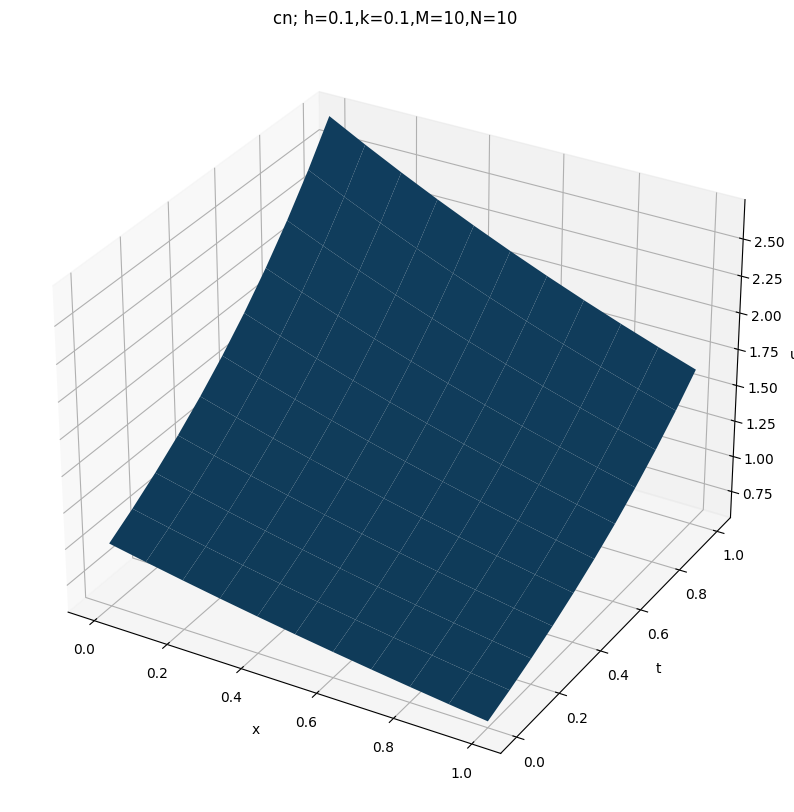

In [ ]:
# example 04 ~ adjusted from program 04

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# actual
U_act = lambda x,t: np.exp(t-x/2)

# bvp
U = lambda x: np.exp(-x/2)
BCL = lambda x,t: np.exp(t)
BCR = lambda x,t: np.exp(t-1/2)

# some parms
D = 4  # diffusion constant

# mesh
x,t = [0,1],[0,1]
h = k = 0.1
M = round((x[1]-x[0])/h)
N = round((t[1]-t[0])/k)
m = M-1 # interior points [1,m]
n = N   # time steps [1,n] ~ [0,n); however, solution [0,n]
sigma = D*k/pow(h,2)

# DF for interior
a = np.zeros((m,m))
a.flat[0::m+1] = 2+2*sigma
a.flat[1::m+1] = a.flat[m::m+1] = -sigma
b = np.zeros((m,m))
b.flat[0::m+1] = 2-2*sigma
b.flat[1::m+1] = b.flat[m::m+1] =  sigma

# approx soln, initialize
ws = np.zeros((M+1,N+1)) # [0:M,0:N]

# approx soln, bc
ts = np.linspace(t[0],t[1],n+1)
ws[0,:] = BCL(x[0],ts)
ws[M,:] = BCR(x[1],ts)

# approx soln, ic
xs = np.linspace(x[0],x[1],M+1)
ws[:,0] = U(xs) # ic

# approx soln, calc interior % w(:,j+1)=a\(b*w(:,j)+sigma*sides);
for j in range(n):
  ws[1:m+1,j+1] = ws[1:m+1,j]
  ws[1:m+1,j+1] = np.dot(b,ws[1:m+1,j+1])
  ws[1,j+1] += sigma*(ws[  0,j]+ws[  0,j+1])
  ws[m,j+1] += sigma*(ws[m+1,j]+ws[m+1,j+1])
  ws[1:m+1,j+1] = np.dot(np.linalg.inv(a),ws[1:m+1,j+1])

if False:
  print(ws[0:11,0:6])

# plot some
if True:
  x,y = np.meshgrid(xs,ts,indexing='ij')
  fig,axs = plt.subplots(1,1,figsize=(10,10),subplot_kw={'projection':'3d'})

  axs.set_title("cn; h="+str(h)+",k=" + str(k)+",M="+str(M)+",N="+str(N))
  #axs.plot_wireframe(x,y,ws)
  axs.plot_surface(x,y,ws)
  axs.set_xlabel("x")
  axs.set_ylabel("t")
  axs.set_zlabel("u")

plt.show()


##### usw


error for FDM.

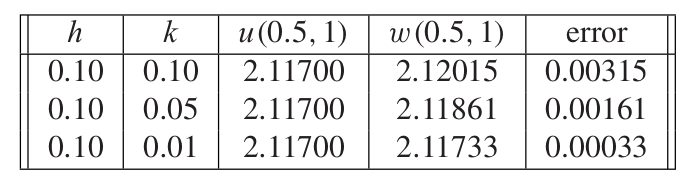

error for CN.

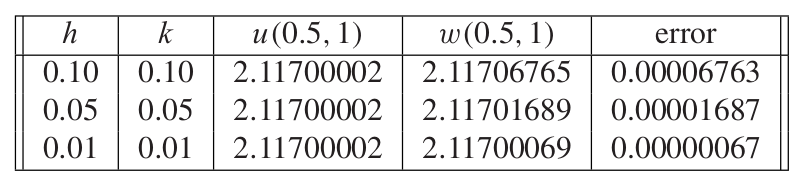

##### example 05


apply CN to some population density. lets say prairie dogs in the badlands of the dakotas. bc these methods are about more than heat tho you cant tell by looking at the problem statement in numbers.
</br></br>

\begin{align}
  \text{example 05} \quad
  \left\{ \quad
    \begin{array}{l}
      u_t = Du_{xx} + Cu &\qquad 0\le x\le 1,t\ge 0,D=4 \\
      u(x,0) = sin^2(\frac{\pi}{L}x) &\qquad 0\le x\le L \\
      u(0,t) = e^t &\qquad t\ge 0 \\
      u(L,t) = e^{t-\frac{1}{2}} &\qquad t\ge 0
    \end{array}
  \right.
\end{align}
</br>

to make it more incarcerated, note that the dirichlet boundary conditions assume that the population cannot live outside their physical territory of $0\le x\le L$ this setup is a <b>reaction-diffusion</b> equation and the diffusion term $Du_{xx}$ causes the population to spread along $x$ while $Cu$ contributes to the population growth. in reaction-diffusion equations, there is competition between the smoothing tendency of diffusion and the growth contribution of the reaction. so survival here depends on $D,C,L$.
</br>


for CN, apply to $u_t$,
</br></br>

\begin{align}
  LHS &= \frac{1}{k}(w_{ij} - w_{i,j-1}) \\
  RHS &= \frac{1}{2}\left(D\frac{w_{i+1,j}-2w_{ij}+w_{i-1,j}}{h^2} + Cw_{ij}\right) + \frac{1}{2}\left(D\frac{w_{i+1,j-1}-2w_{i,j-1}+w_{i-1,j-1}}{h^2} + Cw_{i,j-1}\right) \\
  \\
  &\quad\Downarrow \quad \sigma = \frac{Dk}{h^2} \\
  \\
  &-\sigma w_{i+1,j-1} + (2+2\sigma-kC)w_{ij} - \sigma w_{i+1,j} = \sigma w_{i-1,j-1} + (2-2\sigma+kC)w_{i,j-1} + \sigma w_{i+1,j-1}.
\end{align}
</br>

ie, the main diagonal of $A$ needs to subtract $kC$ and the offset needs to add the same. thats two lines of code to change.
</br></br>

$D=1$ and $C=9.5$ (extinction!), $10$ (survival) where $C > \frac{\pi^2D}{L^2}$.
</br>


###### code, matlab


[matlab online](https://matlab.mathworks.com)

```
% Program 04 Crank-Nicolson method ~ modified for eg 8.5
% with Dirichlet boundary conditions
% input: space interval [xl,xr], time interval [yb,yt],
% number of space steps M, number of time steps N
% output: solution w
% Example usage: w=crank(0,1,0,2,10,10)
function w=crank(xl,xr,yb,yt,h,k) %M,N)
  f=@(x,xlim) sin(pi*x/xlim).^2;
  l=@(t) 0*t;
  r=@(t) 0*t;
  D=1;   % diffusion coefficient
  C=10; % growth coeff
  xlim=xr;
  %h=(xr-xl)/M;k=(yt-yb)/N; % step sizes
  M=round((xr-xl)/h);N=round((yt-yb)/k);
  sigma=D*k/(h*h); m=M-1; n=N;
  % define tridiagonal matrix a
  a=diag(2+2*sigma*ones(m,1)-k*C)+diag(-sigma*ones(m-1,1),1);
  a=a+diag(-sigma*ones(m-1,1),-1);
  % define tridiagonal matrix b
  b=diag(2-2*sigma*ones(m,1)+k*C)+diag(sigma*ones(m-1,1),1);
  b=b+diag(sigma*ones(m-1,1),-1);
  lside=l(yb+(0:n)*k); rside=r(yb+(0:n)*k);
  w(:,1)=f(xl+(1:m)*h,xlim)';
  % initial conditions
  for j=1:n
    sides=[lside(j)+lside(j+1);zeros(m-2,1);rside(j)+rside(j+1)];
    w(:,j+1)=a\(b*w(:,j)+sigma*sides);
  end
  w=[lside;w;rside];
  x=xl+(0:M)*h;t=yb+(0:N)*k;
  mesh(x,t,w');
  view (60,30); axis([xl xr yb yt])
end
```



###### code, python


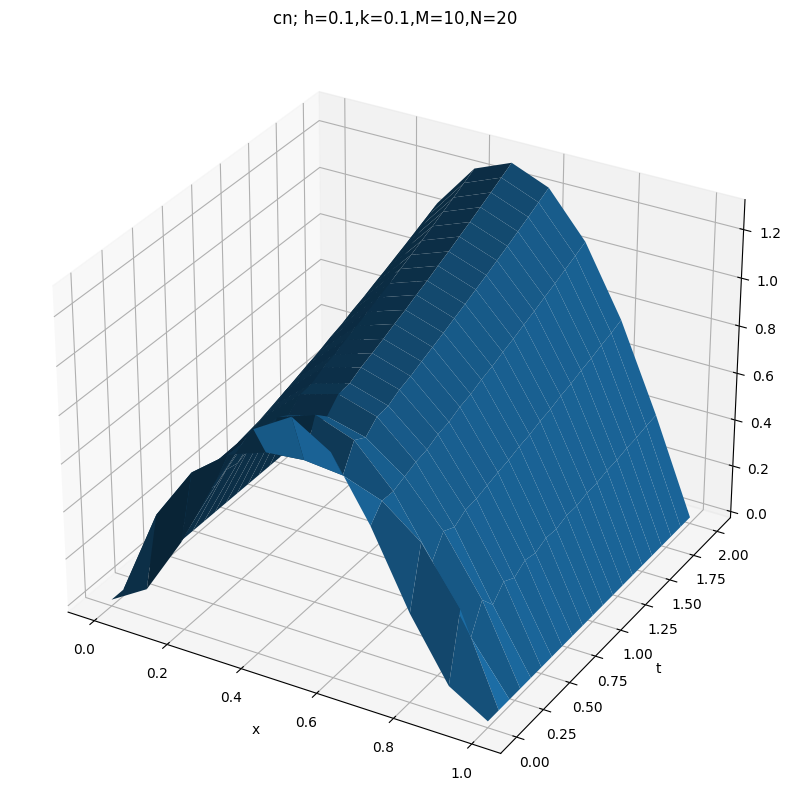

In [ ]:
# example 05 ~ crank-nicolson, adjusted from program 04

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

np.set_printoptions(precision=3)

# bvp
U = lambda x,xlim: pow(np.sin(np.pi*x/xlim),2)
BCL = lambda x,t: 0*t
BCR = lambda x,t: 0*t

# some parms
D = 1    # diffusion constant
L = 1    # x, limit
C = 10.  # growth coeff
#C_lim = pow(np.pi,2)*D/pow(L,2)
#print(f"C, limit = {C_lim}")

# mesh
x,t = [0,L],[0,2]
h = k = 0.1
M = round((x[1]-x[0])/h)
N = round((t[1]-t[0])/k)
m = M-1 # interior points [1,m]
n = N   # time steps [1,n] ~ [0,n); however, solution [0,n]
sigma = D*k/pow(h,2)

# DF for interior
a = np.zeros((m,m))
a.flat[0::m+1] = 2+2*sigma - k*C
a.flat[1::m+1] = a.flat[m::m+1] = -sigma
b = np.zeros((m,m))
b.flat[0::m+1] = 2-2*sigma + k*C
b.flat[1::m+1] = b.flat[m::m+1] =  sigma
# approx soln, initialize
ws = np.zeros((M+1,N+1)) # [0:M,0:N]

# approx soln, bc
ts = np.linspace(t[0],t[1],n+1)
ws[0,:] = BCL(x[0],ts)
ws[M,:] = BCR(x[1],ts)

# approx soln, ic
xs = np.linspace(x[0],x[1],M+1)
ws[:,0] = U(xs,L) # ic

# approx soln, calc interior
for j in range(n):
  ws[1:m+1,j+1] = ws[1:m+1,j]
  ws[1,j+1] += sigma*(ws[  0,j]+ws[  0,j+1])/2
  ws[m,j+1] += sigma*(ws[m+1,j]+ws[m+1,j+1])/2
  ws[1:m+1,j+1] = np.dot(np.linalg.inv(a),np.dot(b,ws[1:m+1,j+1]))

# plot some
if True:
  x,y = np.meshgrid(xs,ts,indexing='ij')
  fig,axs = plt.subplots(1,1,figsize=(10,10),subplot_kw={'projection':'3d'})

  axs.set_title("cn; h="+str(h)+",k=" + str(k)+",M="+str(M)+",N="+str(N))
  #axs.plot_wireframe(x,y,ws)
  axs.plot_surface(x,y,ws)
  axs.set_xlabel("x")
  axs.set_ylabel("t")
  axs.set_zlabel("u")

  plt.show()


##### usw


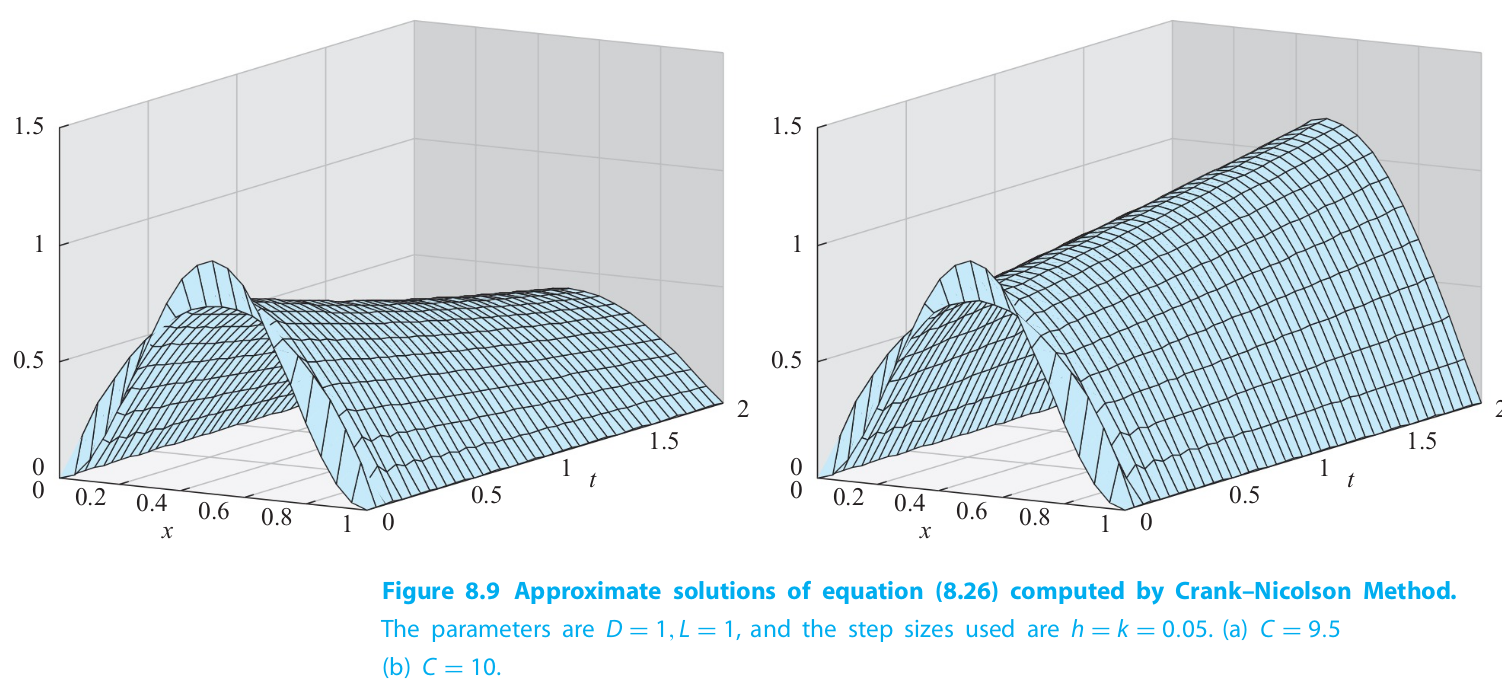

#### resources


[heat conduction: mathematical modeling and experimental data](https://emerginginvestigators.org/articles/heat-conduction-mathematical-modeling-and-experimental-data/pdf); qingyu zhu, hien tran, and hong yang; ncu.
</br>

[numerical methods for differential equations with python](https://johnsbutler.netlify.app/files/Teaching/Numerical_Analysis_for_Differential_Equations.pdf), john s butler.
</br>

[learn about unconditional stability and potential instability in RF amplifier design](https://www.allaboutcircuits.com/technical-articles/learn-about-unconditional-stability-and-potential-instability-in-rf-amplifier-design/), all about circuits.
</br>
